<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/DroneAsnmnt_Freg_Score94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
with open("./sample_data/Drone_Data_clnd.csv", 'r',encoding = "utf-8") as file:
    for i in range(0,4):
        print(file.readline())

﻿Model,L,W,H,Propellers total,Vertical stabilizer Winglets,Max speed,,,,,,,,,,,,,,,,,,,,,

Aerob 4D,1450,3600,440,1,2,41.67,,,,,,,,,,,,,,,,,,,,,

AeroVironment Wasp III,380,720,150,1,1,18.06,,,,,,,,,,,,,,,,,,,,,

Apex,1850,4300,500,1,2,27.78,,,,,,,,,,,,,,,,,,,,,



In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

print("If there are no errors, modules are load!")

If there are no errors, modules are load!


In [16]:
import pandas as pd

# Here we upload the data from csv files using pandas
# the comma separates the coulms and we see the countries in each line.
dataFrame = pd.read_csv("./sample_data/Drone_Data_clnd.csv", delimiter=',', encoding='utf-8') 

#print(drdata.head())

In [17]:
# Now we want to separate those from the dataset
from sklearn import preprocessing
df_l_w_h = dataFrame[["L", "W","H"]]
#print(drdata_l_w_h.head())
#df_l_w_h.isnull()


In [18]:
# Now we need to order the data according to the growing score
df_sorted = df_l_w_h.sort_values(by=["H"],ascending=True)
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

df_sorted.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
#Tell you rows and columns in oyur data
df_sorted.shape

#print(drdata_sorted.head(38))

(38, 3)

In [19]:
#correlation between paramters
print(df_sorted.corr())

          L         W         H
L  1.000000  0.958773  0.920486
W  0.958773  1.000000  0.907141
H  0.920486  0.907141  1.000000


In [55]:
#d = preprocessing.normalize(df_sorted)
d = df_sorted
df_normalized = pd.DataFrame(d, columns=["L", "W","H"])
df_normalized.head()

,L,W,H
4,190.0,150.0,5.0
14,4500.0,3660.0,31.0
8,450.0,1470.0,120.0
15,720.0,1280.0,128.0
1,380.0,720.0,150.0


In [56]:
print(df_normalized.head(38))

          L        W       H
4     190.0    150.0     5.0
14   4500.0   3660.0    31.0
8     450.0   1470.0   120.0
15    720.0   1280.0   128.0
1     380.0    720.0   150.0
33    350.0   1000.0   180.0
10    560.0   1420.0   180.0
19    400.0   1000.0   200.0
22    700.0   2000.0   200.0
11    300.0    800.0   200.0
16    800.0   1360.0   200.0
26    600.0   1680.0   200.0
6     460.0   1200.0   200.0
28    720.0   3500.0   200.0
30    400.0    640.0   200.0
24    540.0    980.0   200.0
18    520.0    820.0   240.0
37    800.0   2200.0   240.0
36    620.0   1600.0   250.0
32   1200.0   3000.0   250.0
29    700.0   1800.0   250.0
27    644.0   1948.0   250.0
20    450.0   1100.0   250.0
13    450.0   1470.0   280.0
34   1000.0   2400.0   280.0
23    450.0   1470.0   300.0
25   1200.0   1500.0   300.0
17   1200.0   2300.0   300.0
35    610.0   2000.0   300.0
21   1000.0   2300.0   300.0
12    830.0   2200.0   380.0
9     860.0   2200.0   380.0
3    1100.0   2300.0   400.0
0    1450.0   

In [22]:
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
'''
df_sorted.drop(
    
    labels=[31,5,14],
    axis=0,
    inplace=True
)
'''

'\ndf_sorted.drop(\n    \n    labels=[31,5,14],\n    axis=0,\n    inplace=True\n)\n'

In [57]:
print(df_normalized.describe())

                  L             W            H
count     38.000000     38.000000    38.000000
mean    1410.631579   2449.157895   420.631579
std     2347.173348   2772.085160   641.210739
min      190.000000    150.000000     5.000000
25%      452.500000   1220.000000   200.000000
50%      700.000000   1740.000000   250.000000
75%     1075.000000   2300.000000   300.000000
max    11000.000000  15000.000000  3000.000000


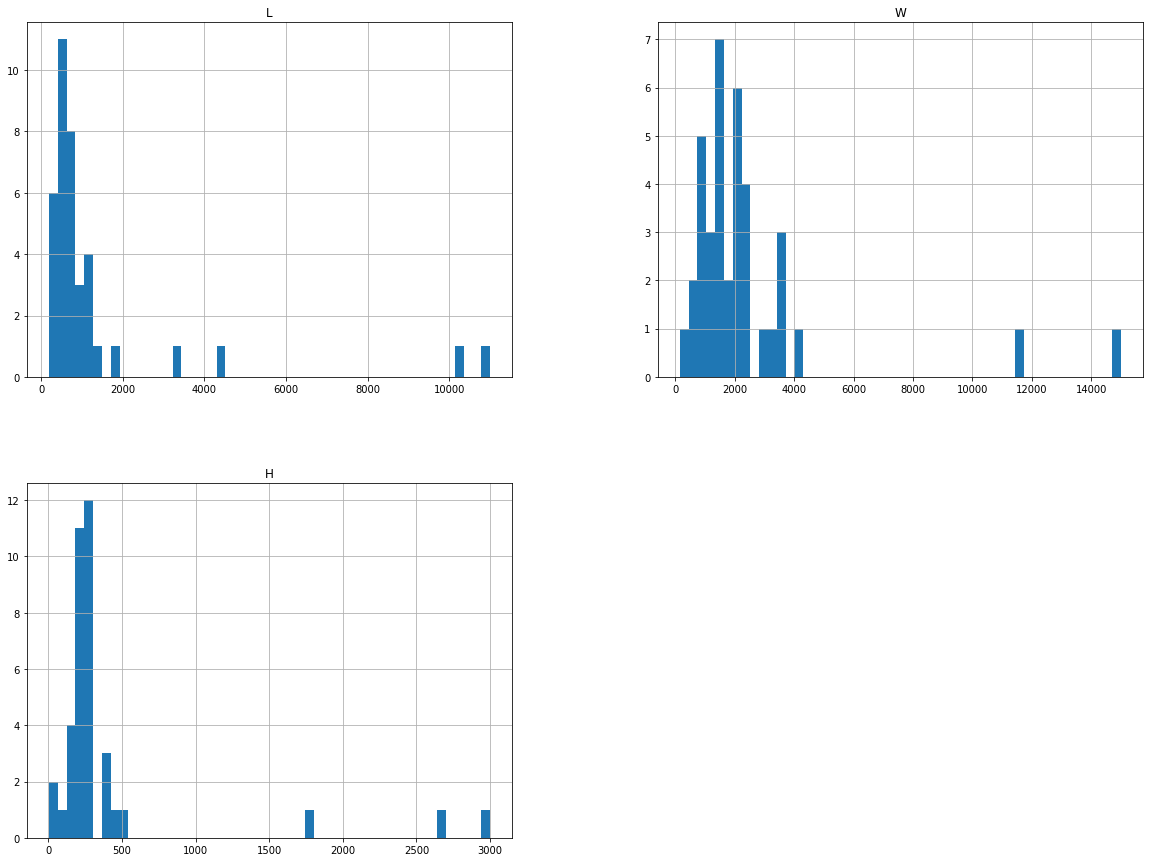

In [58]:
#Multiple linear Regressor
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

%matplotlib inline
import matplotlib.pyplot as plt
df_normalized.hist(bins=50, figsize=(20,15))
#save_fig('histograms')
plt.show()

In [71]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X= df_normalized.drop(columns = 'H')
y=df_normalized['H']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#test_set.head()

In [72]:
y.head(11)

4       5.0
14     31.0
8     120.0
15    128.0
1     150.0
33    180.0
10    180.0
19    200.0
22    200.0
11    200.0
16    200.0
Name: H, dtype: float64

In [41]:
'''
d_names = (train_set, test_set)
#print (d_names)
y_pos = range(len(d_names))
plt.bar(
    y_pos, 
    (train_set.shape[0], test_set.shape[0]), 
    align='center', 
    alpha=0.8
)
#plt.xticks(y_pos, d_names)
plt.ylabel('Number of rows') 
plt.title('😱 Train Vs Test Samples!')
plt.show()
'''

"\nd_names = (train_set, test_set)\n#print (d_names)\ny_pos = range(len(d_names))\nplt.bar(\n    y_pos, \n    (train_set.shape[0], test_set.shape[0]), \n    align='center', \n    alpha=0.8\n)\n#plt.xticks(y_pos, d_names)\nplt.ylabel('Number of rows') \nplt.title('😱 Train Vs Test Samples!')\nplt.show()\n"

In [13]:
'''
df_lw = train_set.drop("H", axis=1) # drop labels for training set
df_h_label = train_set["H"].copy()
'''

'\ndf_lw = train_set.drop("H", axis=1) # drop labels for training set\ndf_h_label = train_set["H"].copy()\n'

In [ ]:
'''
df_lw.head()
'''

In [ ]:
#df_h_label.head()

In [ ]:
'''
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
from sklearn.compose import ColumnTransformer
'''

In [73]:
'''
num_attribs = list(df_lw)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train
X_test_scaled = X_test
#df_prepared = full_pipeline.fit_transform(df_lw)
#label_prepared = full_pipeline.transform(df_h_label) 
#df_prepared
X_test_scaled

,L,W
0,1450.0,3600.0
31,10250.0,11500.0
1,380.0,720.0
28,720.0,3500.0
12,830.0,2200.0
25,1200.0,1500.0
10,560.0,1420.0
17,1200.0,2300.0


In [74]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#reg = LogisticRegression(random_state=42)
reg = RandomForestRegressor(n_estimators=10, random_state=42)
#reg = SVR(kernel="linear")
#reg = LinearRegression()
reg.fit(X_train_scaled,y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [75]:
reg.predict(X_train_scaled)


array([ 314. ,  221. ,  259. ,  210. ,  224. ,  202.8,  303. ,  196. ,
        370. ,   98.5,  241. ,  186. ,  230. ,  384.8, 2406.2,  255. ,
        241. ,  330. , 1446.2,  142.4,  398.1,  241. ,  336. ,  185.6,
        235. ,  230. ,  240. ,  194. ,  200. ,  265. ])

In [76]:
reg.score(X_train_scaled,y_train)

0.9329345653931755

In [77]:
reg.score(X_test_scaled,y_test)

0.9760292379695534

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_predictions = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, df_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, df_predictions)
#print('My name is', os.getlogin(), 'and I am', 42)
print ('RMSE:', rmse, 'and MAE:', mae) 

RMSE: 124.82490737028412 and MAE: 90.10000000000002
